In [4]:
import os
from pathlib import Path
import tifffile as tf
from IPython.display import Image, display

from gvxrPython3 import gvxr, json2gvxr

from cil.utilities.jupyter import islicer
from cil.processors import TransmissionAbsorptionConverter
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK

In [5]:
JSON_fname = "2StrokeEngine.json"
file_abs_path = os.path.abspath(JSON_fname)
dir_path = os.path.dirname(file_abs_path)

In [6]:
json2gvxr.initGVXR(JSON_fname, "EGL")
json2gvxr.initDetector()
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()
json2gvxr.initScan()

Create an OpenGL context: 450x450
Set up the detector
	Detector position: [0, -150, 0, 'mm']
	Detector up vector: [0, 0, 1]
	Detector number of pixels: [900, 900]
	Pixel spacing: [0.5, 0.5, 'mm']
Set up the beam
	Source position: [0, 600, 0, 'mm']
	Source shape: Point
Set up the CT Scan


Sat Oct 22 21:08:19 2022 ---- Create window (ID: -1)
Sat Oct 22 21:08:19 2022 ---- Query the number of EGL devices
Sat Oct 22 21:08:19 2022 ---- Success
Sat Oct 22 21:08:19 2022 ---- Detected 2 EGL devices.
Sat Oct 22 21:08:19 2022 ---- Print the details here of every EGL device.
Sat Oct 22 21:08:19 2022 ---- Success
Sat Oct 22 21:08:19 2022 ---- Device 1/2:
Sat Oct 22 21:08:19 2022 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_query_name EGL_EXT_device_persistent_id
Sat Oct 22 21:08:19 2022 ---- 	Device vendor: NVIDIA
Sat Oct 22 21:08:19 2022 ---- 	Failed to retrieve EGL DRM device file.
Sat Oct 22 21:08:19 2022 ---- Device 2/2:
Sat Oct 22 21:08:19 2022 ---- 	Device Extensions: EGL_MESA_device_software
Sat Oct 22 21:08:19 2022 ---- 	Failed to retrieve device vendor.
Sat Oct 22 21:08:19 2022 ---- 	Failed to retrieve EGL DRM device file.
Sat Oct 22 21:08:19 2022 ---- EGL client extensions: EGL_EXT_platform_base EGL_EXT_devic

In [7]:
# Get the path where the projections are
output_path = json2gvxr.params["Scan"]["OutFolder"]

# Is an absolute path?
if output_path[0] != "/":
    output_path = dir_path + "/" + output_path

In [8]:
gif_fname = json2gvxr.params["Scan"]["GifPath"]

if os.path.exists(gif_fname):
    with open(gif_fname,'rb') as f:
        display(Image(data=f.read(), format='png', width=1000))

In [9]:
from gVXRDataReader import *

astropy module not found


In [10]:
angle_set = np.linspace(0, 360, 900, False)

In [11]:
reader = gVXRDataReader(file_name=output_path, angle_set=angle_set)
data = reader.read()
gvxr.terminate()

AttributeError: module 'gvxrPython3._gvxrPython3.temp_gvxrPython3' has no attribute 'getSourceShape'

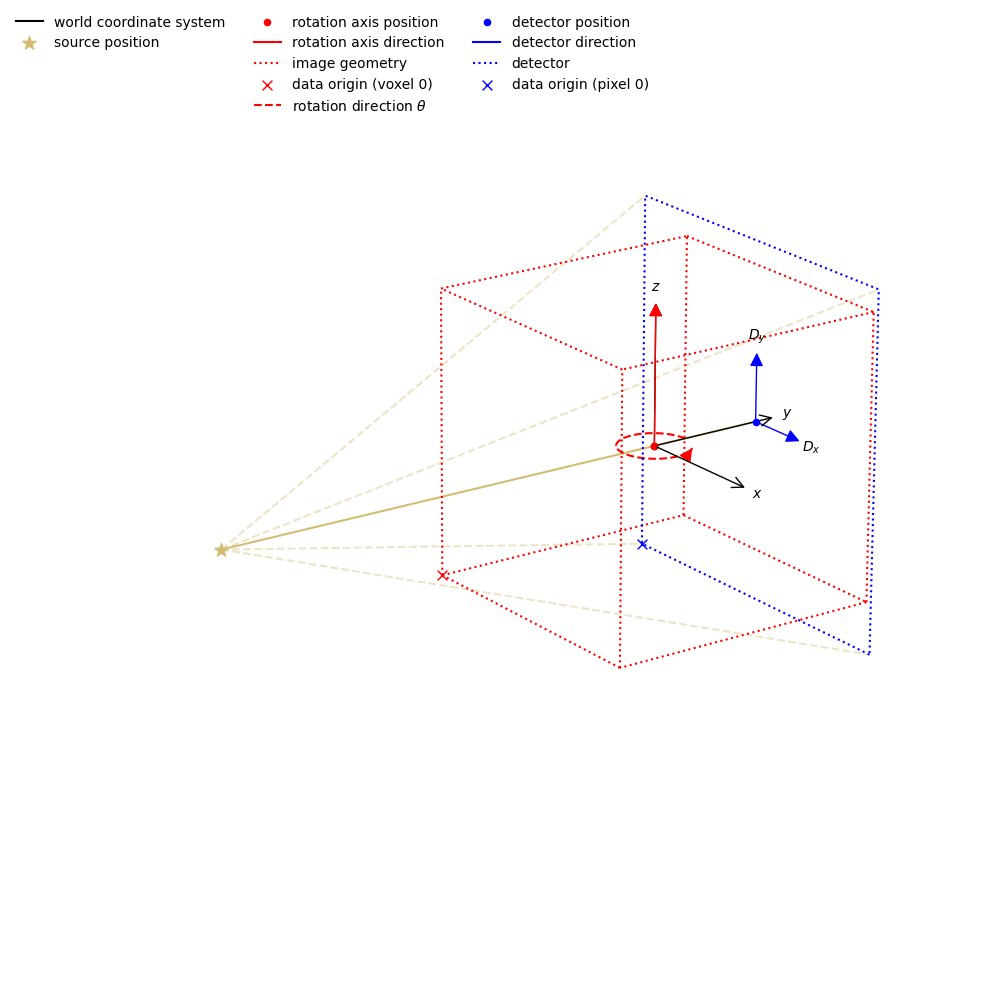

In [10]:
show_geometry(data.geometry)

In [11]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [12]:
ig = data.geometry.get_ImageGeometry()

ig.voxel_num_x = 600
ig.voxel_num_y = 600
ig.voxel_num_z = 700

reco1 = FDK(data_corr, ig).run()

FDK recon

Input Data:
	angle: 900
	vertical: 900
	horizontal: 900

Reconstruction Volume:
	vertical: 700
	horizontal_y: 600
	horizontal_x: 600

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	FFT order: 11
	Filter_inplace: False



In [13]:
islicer(reco1, direction='vertical')

interactive(children=(IntSlider(value=350, continuous_update=False, description='vertical', max=699), FloatRan…

IntSlider(value=350, continuous_update=False, description='vertical', max=699)

In [14]:
islicer(reco1, direction='horizontal_x')

interactive(children=(IntSlider(value=300, continuous_update=False, description='horizontal_x', max=599), Floa…

IntSlider(value=300, continuous_update=False, description='horizontal_x', max=599)